### MINIATURA DE SONIDO METODO 2

In [ ]:
import librosa
audio_data = 'onerepublic.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

### Visualiazaciones Generales


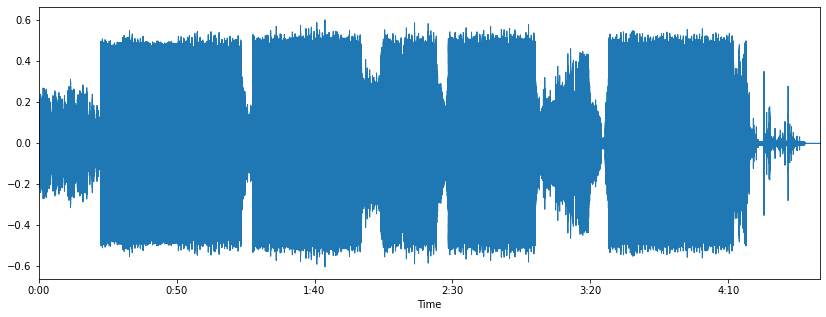

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

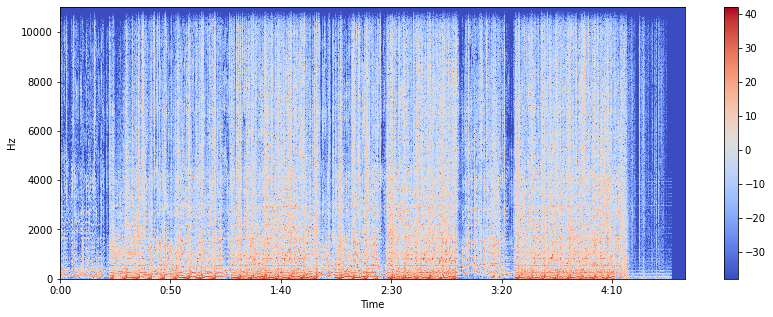

In [102]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

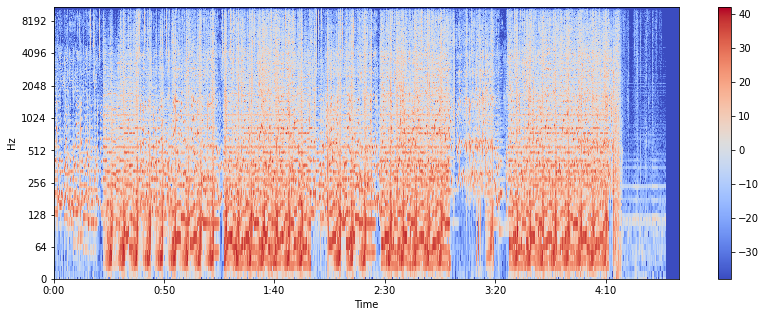

In [103]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Centroide espectral

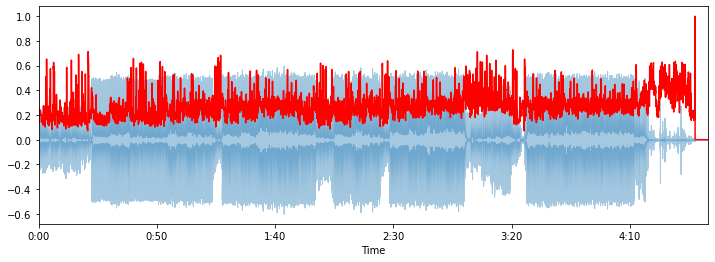

In [104]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [105]:
import numpy as np
lst = []
for x in spectral_centroids:
    lst.append(x)

In [106]:
dt=15
print(len(lst))
tt=t[len(t)-1]
cs=len(lst)/tt

12193


In [107]:
dt*cs

646.0490789939099

In [108]:
from sklearn.metrics import mean_squared_error
from math import floor
from math import ceil
lst2=[]
for i in range(len(lst)-floor(dt*cs)):
    lst2.append(lst[i:i+floor(dt*cs)])

### Calculo de la distancia

In [109]:
lst2extra=[]
lst3mse=[]
for i in range(len(lst)-len(lst2[1])):
    lst2extra.clear()
    lst2extra=[sum(lst2[i])/len(lst2[i])]*(len(lst)-len(lst2[1]))
    lst2final=lst2[i]+lst2extra
    lst3mse.append(mean_squared_error(lst,lst2final))
print(len(lst3mse))

11547


In [110]:
msemin=min(lst3mse)
indexmse=lst3mse.index(msemin)

In [111]:
while indexmse<=500:
    lst3mse.remove(min(lst3mse))
    msemin=min(lst3mse)
    indexmse=lst3mse.index(msemin)

In [112]:
msemin=min(lst3mse)
print(msemin)
indexmse=lst3mse.index(msemin)
print(indexmse)

857216.6279656178
4259


In [113]:
z=indexmse
print(t[z])

98.89378684807257


### Exportador de la canción

In [114]:
from pydub import AudioSegment
t1 = (t[z]) * 1000 #funciona en microsegundos
t2 = (t[z]+dt) * 1000
newAudio = AudioSegment.from_wav(audio_data)
newAudio = newAudio[t1:t2]
newAudio.export("Resumenversionfinal"+audio_data, format="wav") 

<_io.BufferedRandom name='Resumenversionfinalonerepublic.wav'>